# Análisis de regresión lineal simple

In [4]:
# Instala dependencias
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase9_BaseRegresionLinealSimpleYMultiple.sav

## Visualización de datos

In [7]:
import pandas as pd

df = pd.read_spss("Clase9_BaseRegresionLinealSimpleYMultiple.sav")
df

,Código,Sexo,Relación,HistVinc,Afroproblema,Afroemoción,Estrés_académico,ZRE_1
0,001,Femenino,Si,6.0,29.230769,38.0,45.0,1.051546
1,002,Femenino,No,7.0,23.846154,45.0,45.0,-0.554502
2,003,Femenino,No,8.0,24.615385,50.0,45.0,-1.437566
3,004,Femenino,No,5.0,21.538462,45.0,45.0,-0.686559
4,005,Femenino,Si,8.0,30.000000,49.0,44.0,-1.224418
...,...,...,...,...,...,...,...,...
67,068,Masculino,Si,21.0,33.846154,11.0,20.0,-0.688115
68,069,Masculino,No,18.0,34.615385,11.0,20.0,-0.644096
69,070,Masculino,Si,23.0,35.384615,9.0,18.0,-0.790046
70,071,Femenino,No,24.0,28.461538,8.0,17.0,-1.281200


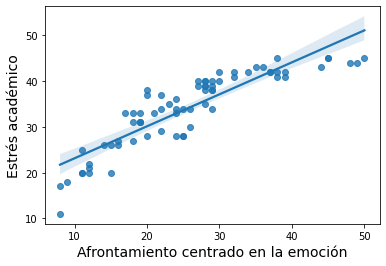

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x="Afroemoción", y="Estrés_académico", data=df)
ax.set_xlabel("Afrontamiento centrado en la emoción", size=14)
ax.set_ylabel("Estrés académico", size=14)
plt.show()

## Verificación de supuestos

### Linealidad de la relación

In [13]:
pg.normality(data=df[["Estrés_académico", "Afroemoción"]], method="shapiro")

,W,pval,normal
Estrés_académico,0.935916,0.001187,False
Afroemoción,0.971221,0.097621,True


In [14]:
pg.pairwise_corr(
    columns=["Estrés_académico", "Afroemoción"], method="spearman", data=df
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Estrés_académico,Afroemoción,spearman,two-sided,72,0.937399,"[0.9, 0.96]",8.671824e-34,1.0


### Normalidad de residuos

In [10]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("Estrés_académico ~ Afroemoción", data=df).fit();

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

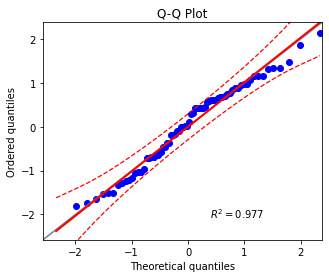

In [11]:
import pingouin as pg

pg.qqplot(model.resid)

In [15]:
pg.normality(data=model.resid, method="shapiro")

,W,pval,normal
0,0.976633,0.200022,True


## Evaluación del modelo de regresión

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Estrés_académico   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     260.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.61e-25
Time:                        00:00:55   Log-Likelihood:                -196.34
No. Observations:                  72   AIC:                             396.7
Df Residuals:                      70   BIC:                             401.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.1631      1.197     13.498      0.000      13.775      18.551
Afroemoción     0.6985      0.043     16.153      0.000       0.612       0.785
==============================================================================
Omnibus:                        1.936   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.934
Skew:                          -0.366   Prob(JB):                        0.380
Kurtosis:                       2.671   Cond. No.                         75.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ejercicio 1 

Un grupo de investigadores plantea que el afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes. Para evaluar su hipótesis tomaron una muestra de 72 jóvenes a quienes aplicaron el Inventario de Estimación del Afrontamiento y la Escala de Estrés Académico.

- Indica la hipótesis de estudio, la ecuación del modelo de regresión lineal simple y el signo que debiera tener beta (B) si la hipótesis de estudio fuera cierta.
- Evalúa si habría evidencia a favor de una posible relación entre las variables con un diagrama de dispersión.
- Evalúa la correlación entre las variables.
- Estima los parámetros del modelo de regresión.
- Indica la magnitud del coeficiente de determinación e interpreta su valor.
- Realiza el contraste de hipótesis correspondiente y concluir en función a la hipótesis de estudio.

1. Indicar la ecuación del modelo de regresión lineal simple indicando el signo que debiera tener beta (B) si la hipótesis de estudio fuera cierta.

Hipótesis de estudio: El afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes.
- Variable predictora (X): Afrontamiento centrado en el problema    
- Variable de salida (Y): Estrés académico

Ecuación del modelo de regresión lineal simple:
- $EstrésAcadémico = α + β \times AfrontamientoProblema \pm \epsilon $, con $B<0$

2. Evaluar si habría evidencia a favor de una posible relación entre las variables con un diagrama de dispersión.

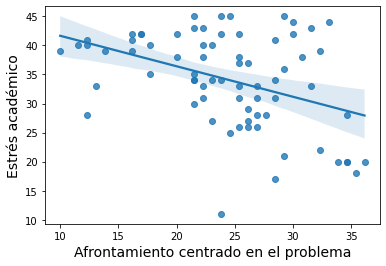

In [24]:
ax = sns.regplot(x="Afroproblema", y="Estrés_académico", data=df)
ax.set_xlabel("Afrontamiento centrado en el problema", size=14)
ax.set_ylabel("Estrés académico", size=14)
plt.show()

3. Evaluar la correlación entre las variables.  
- H0: rxy = 0
- H1: rxy < 0

Prueba de normalidad para aplicar el coeficiente de correlación pertinente.


In [26]:
pg.normality(data=df[["Estrés_académico", "Afroproblema"]], method="shapiro")

,W,pval,normal
Estrés_académico,0.935916,0.001187,False
Afroproblema,0.974104,0.143369,True


In [30]:
pg.pairwise_corr(
    columns=["Estrés_académico", "Afroproblema"],
    method="spearman",
    alternative="less",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Estrés_académico,Afroproblema,spearman,less,72,-0.36676,"[-1.0, -0.18]",0.000765,0.942093


Los resultados del análisis de correlación evidencian que existe una relación estadísticamente significativa, negativa y mediana, según el criterio de Cohen (1988), entre afrontamiento centrado en el problema y estrés académico, r(70) = -.37, p < .001 (unilateral).

4. Estimar los parámetros del modelo de regresión.

In [33]:
model = smf.ols("Estrés_académico ~ Afroproblema", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Estrés_académico   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     14.07
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           0.000360
Time:                        00:18:50   Log-Likelihood:                -245.67
No. Observations:                  72   AIC:                             495.3
Df Residuals:                      70   BIC:                             499.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.9092      3.516     13.341      0.000      39.896      53.922
Afroproblema    -0.5247      0.140     -3.750      0.000      -0.804      -0.246
==============================================================================
Omnibus:                        1.567   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.060
Skew:                          -0.284   Prob(JB):                        0.589
Kurtosis:                       3.172   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import numpy as np

error = np.sqrt(model.mse_resid)
print("Error estándar de la estimación:", error)

Error estándar de la estimación: 7.4425944756640865


$EstrésAcadémico = 46.909 + -0.525 \times AfrontamientoProblema \pm 7.443 $

5. Indicar la magnitud del coeficiente de determinación e interpretar su valor.

Según Cohen (1988) es un R2 “mediano”. Interpretación: Existe un 16.7% de diferencias en el estrés académico que estarían asociadas al afrontamiento centrado en el problema en los jóvenes estudiantes.

6. Realizar el contraste de hipótesis correspondiente y concluir en función a la hipótesis de estudio.

Hipótesis de estudio: El afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes.
- $H_{0}$: $β = 0$      vs      $H_{1}$: $β < 0$

Se rechaza $H_{0}$, ya que p (unilateral) $.000/2 = <.001$

Luego, como $β = -0.525  < 0$, se  acepta $H_{1}$

Conclusión: 
El afrontamiento centrado en el problema predice significativamente un menor estrés académico percibido por los estudiantes,  $β = -0.525$, $EE_{β} = 0$.14, $t(70) = -3.75$, $p <.001$, existiendo entre ambos una relación significativa con un tamaño de efecto mediano, $R^{2} = .167$, $F(1,70) = 14.07$, $p <.001$. Por tanto, se cumple la hipótesis de investigación.